# **Part-1**


In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

## **Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

* **NLTK:** The Natural Language Toolkit is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language.

In [3]:
%%capture
import nltk

# Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# Parts of Speech
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# Lemmatization
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Vader Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# SentiWordNet Sentiment Analysis
from nltk.corpus import sentiwordnet
nltk.download('sentiwordnet')

## **Handling Dataset**

* **Reading Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/public-sentiment-analysis-based-on-twitter-hashtags/datasets/dataset.csv')
print('Count of rows in the data is:', len(df))
print('Count of columns in the data is:', len(df.columns))

Count of rows in the data is: 35266
Count of columns in the data is: 4


* **Converting Date column from string to datetime format**

In [5]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,Data,Date,Time,tweetcaption
0,tuesdayvibes,2020-07-14,7:00:21,Love it here vacation vibes amazing beautiful ...
1,realmeC11,2020-07-14,7:00:21,Best Camera Smartphone under 20k Please vote a...
2,KPSharmaOli,2020-07-14,7:00:21,shree Why should we have a problem with the pe...
3,RheaChakraborty,2020-07-14,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...
4,Stop_Transfer_Sunita_Yadav,2020-07-14,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...


**Cleaning tweetcaption:**

*   Handling emojis and emoticons
*   Handling contractions
*   Removing single letter words
*   Handling miscellaneous characters (Non ASCII, '@', '#', URLs, 'RT')
*   Handling repeating characters (longggg wayyyy)
*   Removing punctuations
*   Removing numbers


In [6]:
print('Cleaning tweetcaption from the data:\n')

# Emojis Unicode
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)


# This function replaces happy unicode emojis with 'happy' and sad unicode emojis with 'sad'.
def replace_emojis(text):
  emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

  emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

  words = text.split()
  reformed = []
  for w in words:
    if w in emoji_happy:
      reformed.append("happy")
    elif w in emoji_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  text = " ".join(reformed)
  return text


# This function replaces happy smileys with 'happy' and sad smileys with 'sad'
def replace_smileys(text):
  emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

  emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

  words = text.split()
  reformed = []
  for w in words:
    if w in emoticons_happy:
      reformed.append("happy")
    elif w in emoticons_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  text = " ".join(reformed)
  return text

#  This function replaces english lanuage contractions like "shouldn't" with "should not"
def replace_contractions(text):
  cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
  "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
  "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
  "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
  "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
  "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
  "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
  "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
  
  words = text.split()
  reformed = []
  for w in words:
    if w in cont:
      reformed.append(cont[w])
    else:
      reformed.append(w)
  text = " ".join(reformed)
  return text  


# This function removes words that are single characters
def remove_single_letter_words(text):
  words = text.split()
  reformed = []
  for w in words:
    if len(w) > 1:
      reformed.append(w)
  text = " ".join(reformed)
  return text  

print('Replacing handwritten emojis with their feeling associated.')
print('Convert to lowercase.')
print('Replace contractions.')
print('Replace unicode emojis with their feeling associated.')
print('Remove all other unicoded emojis.')
print('Remove NON- ASCII characters.')
print('Remove numbers.')
print('Remove "#". ')
print('Remove "@". ')
print('Remove usernames.')
print('Remove "RT".')
print('Replace all URLs and Links with word "URL".')
print('Remove all punctuations.')
print('Remove single letter words.')
print('Remove repeaing characters.')
print('Remove numbers.\n')

# This function cleans the tweetcaption.
def dataclean(text):
  text = replace_smileys(text) # replace handwritten emojis with their feeling associated
  text = text.lower() # convert to lowercase
  text = replace_contractions(text) # replace short forms used in english  with their actual words
  text = replace_emojis(text) # replace unicode emojis with their feeling associated
  text = emoji_pattern.sub(r'', text) # remove emojis other than smiley emojis
  text = re.sub('\\\\u[0-9A-Fa-f]{4}','', text) # remove NON- ASCII characters
  text = re.sub("[0-9]", "", text) # remove numbers # re.sub("\d+", "", t)
  text = re.sub('#', '', text) # remove '#'
  text = re.sub('@[A-Za-z0–9]+', '', text) # remove '@'
  text = re.sub('@[^\s]+', '', text) # remove usernames
  text = re.sub('RT[\s]+', '', text) # remove retweet 'RT'
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text) # remove links (URLs/ links)
  text = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', text) # remove punctuations
  text = remove_single_letter_words(text) # remove single letter words
  text = re.sub(r'(.)1+', r'1', text) # remove repeating characters
  text = re.sub('[0-9]+', '', text) # remove numbers
  text = text.replace('\\\\', '')
  text = text.replace('\\', '')
  return text

df['tweetcaption'] = df['tweetcaption'].apply(dataclean)
print('tweetcaption have been cleaned')

Cleaning tweetcaption from the data:

Replacing handwritten emojis with their feeling associated.
Convert to lowercase.
Replace contractions.
Replace unicode emojis with their feeling associated.
Remove all other unicoded emojis.
Remove NON- ASCII characters.
Remove numbers.
Remove "#". 
Remove "@". 
Remove usernames.
Remove "RT".
Replace all URLs and Links with word "URL".
Remove all punctuations.
Remove single letter words.
Remove repeaing characters.
Remove numbers.

tweetcaption have been cleaned


## **Building functions**


* **def freq_words(tokens):** generating frequency distribution of words
* **def word_cloud(tokens):** plotting word cloud (a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance)
* **def preprocess(text):** applying preprocessing techniques (Tokenization, Removing the stopwprds, Lemmatization)




Pre-processing the tweetcaption:

Steps involved are:
Step 1 - "Tokenization".
Importing the necessary functions required for tokenization.

Step 2 - "Removing the stopwprds".
Importing the necessary functions required for removing stopwords.

Step 3 - "Lemmatization".
Importing the necessary functions required for lemmatization.

Frequency distribution of top 10 words in the tweetcaption.

Top 10 most common words in tweetcaption:

    Tokens  Frequency
0      com      71212
1  twitter      46756
2      amp      29945
3    india      23491
4      get      18364
5     like      17422
6     make      16489
7      one      16456
8     love      16284
9   people      14518


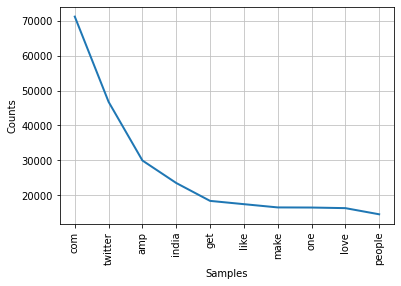

Word Cloud for the pre-processed tweetcaption.


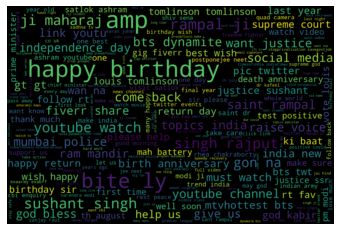

In [7]:
# Frequency distribution of words
def freq_words(tokens):
  from nltk.probability import FreqDist
  fdist = FreqDist(tokens)    

  # Top 10 most common words
  print("Top 10 most common words in tweetcaption:\n")
  df_freq = pd.DataFrame(fdist.most_common(10), columns=['Tokens', 'Frequency'])
  print(df_freq)

  # Plot of top 10 most common words
  fdist.plot(10, cumulative = False)
  plt.show();

# Word Cloud
def word_cloud(tokens):
  from wordcloud import WordCloud
  w = ' '.join([i for i in tokens])
  wc = WordCloud(width = 1500, height = 1000, random_state=42, max_font_size=110).generate(w)
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis('off')
  plt.show();

def preprocess(text):  
  # Tokenization
  tw = []  
  tw = word_tokenize(text)  
  
  # Remove the stopwords
  stop_words = set(stopwords.words('english'))
  fs = [] # filtered list after removing stop words
  fs = ([i for i in tw if i not in stop_words])
  
  # Lemmatization  
  lem = WordNetLemmatizer()
  ns = []
  for i in fs:
    ns.append(lem.lemmatize(i, 'v'))
  ns = ' '.join(ns)
  return ns  

print('Pre-processing the tweetcaption:\n') 
print('Steps involved are:')

print('Step 1 - "Tokenization".')
print('Importing the necessary functions required for tokenization.\n')

print('Step 2 - "Removing the stopwprds".')
print('Importing the necessary functions required for removing stopwords.\n')

print('Step 3 - "Lemmatization".')
print('Importing the necessary functions required for lemmatization.\n')
  
new_list = []
for tweet in df['tweetcaption']:
  new_list.append(preprocess(tweet))

# Graphical display of preprocessed data
tokens = []
for i in new_list:
  tokens.extend(word_tokenize(i))

print('Frequency distribution of top 10 words in the tweetcaption.\n')
freq_words(tokens)

print('Word Cloud for the pre-processed tweetcaption.')
word_cloud(tokens)

* **def getAnalysis(score):** converting sentiment score into sentiment [Positive: 0.15 to 1, Neutral: -0.15 to 0.15, Negative: -1 to -0.15]

In [8]:
# Sentiment score to analysis
def getAnalysis(score):
    if score <= -0.15:
        return 'Negative'
    elif score >= 0.15:
        return 'Positive'
    else:
        return 'Neutral'

* **SentimentIntensityAnalyzer():** VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis. VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

In [9]:
# VADER
analyzer = SentimentIntensityAnalyzer()
df['VADER_Neg'] = df['tweetcaption'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['VADER_Neu'] = df['tweetcaption'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['VADER_Pos'] = df['tweetcaption'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['VADER_Compound'] = df['tweetcaption'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

df['VADER_Sentiment'] = df['VADER_Compound'].apply(getAnalysis)

In [10]:
df['VADER_Sentiment'].value_counts()

Positive    26048
Negative     8219
Neutral       999
Name: VADER_Sentiment, dtype: int64

* **TextBlob:** TextBlob is a python library for Natural Language Processing (NLP). TextBlob is a simple library which supports complex analysis and operations on textual data. TextBlob returns polarity and subjectivity of a sentence. Polarity lies between (-1, 1) where -1 defines a negative sentiment and 1 defines a positive sentiment. 

In [11]:
# TextBlob
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
# Create two new columns 'Subjectivity' and 'Polarity'
df['TextBlob_Subjectivity'] = df['tweetcaption'].apply(getSubjectivity)
df['TextBlob_Polarity'] = df['tweetcaption'].apply(getPolarity)

df['TextBlob_Sentiment'] = df['TextBlob_Polarity'].apply(getAnalysis)

In [12]:
df['TextBlob_Sentiment'].value_counts()

Positive    18928
Neutral     15415
Negative      923
Name: TextBlob_Sentiment, dtype: int64

* **def token_stop_pos(text):** it is the function that takes the text and performs tokenization, removes stopwords, and tags the words to their POS. Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization. 

In [13]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV} 

# Parts of Speech tagging
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS_Tagged'] = df['tweetcaption'].apply(token_stop_pos)

* **def sentiwordnetscore(pos_data):** SentiWordNet is an opinion lexicon derived from the WordNet database where each term is associated with numerical scores indicating positive and negative values.

In [14]:
lem = WordNetLemmatizer()

# SentiWordNet Scoring
def sentiwordnetscore(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = lem.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
        synset = synsets[0]
        swn_synset = sentiwordnet.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        return sentiment;

df['SWN_Score'] = df['POS_Tagged'].apply(sentiwordnetscore)

In [15]:
# SentiWordNet Sentiment
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = lem.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = sentiwordnet.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        
        if not tokens_count:
            return 0
        if sentiment >= 0.15:
            return 'Positive'
        if sentiment <= -0.15:
            return 'Negative'
        else:
            return 'Neutral'

df['SWN_Sentiment'] = df['POS_Tagged'].apply(sentiwordnetanalysis)

In [16]:
df['SWN_Sentiment'].value_counts()

Neutral     27668
Positive     5655
Negative     1933
Name: SWN_Sentiment, dtype: int64

* **Calculating average sentiment combining the three approaches (VADER, TextBlob, SWN)**

In [17]:
# Average of the three approaches
df['Average_Sentiment_Score'] = (df['VADER_Compound'] + df['TextBlob_Polarity'] + df['SWN_Score']) / 3
df['Average_Sentiment'] = df['Average_Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0.15 else ('Negative' if x <= -0.15 else 'Neutral'))
df['Average_sentiment_Value'] = df['Average_Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative':-1})

* **Final distribution of Postive, Neutral and Negative sentiment**

In [18]:
df['Average_Sentiment'].value_counts()

Positive    25121
Negative     6828
Neutral      3317
Name: Average_Sentiment, dtype: int64

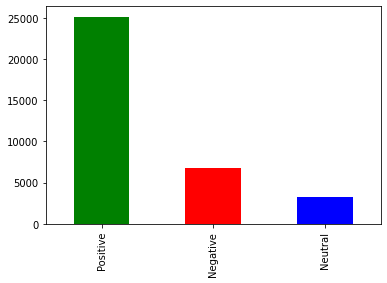

In [19]:
df['Average_Sentiment'].value_counts().plot(kind = 'bar', color = ['g', 'r', 'b']);

* **Final Dataframe containing all scores including average sentiment**

In [20]:
df.head()

,Data,Date,Time,tweetcaption,VADER_Neg,VADER_Neu,VADER_Pos,VADER_Compound,VADER_Sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Sentiment,POS_Tagged,SWN_Score,SWN_Sentiment,Average_Sentiment_Score,Average_Sentiment,Average_sentiment_Value
0,tuesdayvibes,2020-07-14,7:00:21,love it here vacation vibes amazing beautiful ...,0.042,0.797,0.162,0.9757,Positive,0.534259,0.206296,Positive,"[(love, v), (it, None), (here, r), (vacation, ...",0.50,Positive,0.560665,Positive,1
1,realmeC11,2020-07-14,7:00:21,best camera smartphone under please vote and h...,0.029,0.873,0.097,0.8438,Positive,0.524614,0.128278,Neutral,"[(best, a), (camera, n), (smartphone, n), (und...",0.75,Positive,0.574026,Positive,1
2,KPSharmaOli,2020-07-14,7:00:21,shree why should we have problem with the peop...,0.067,0.801,0.131,0.9562,Positive,0.725000,-0.037500,Neutral,"[(shree, a), (why, None), (should, None), (we,...",0.25,Positive,0.389567,Positive,1
3,RheaChakraborty,2020-07-14,7:00:21,rhea chakraborty heartbreaking post on sushant...,0.116,0.708,0.176,0.9324,Positive,0.550000,0.100000,Neutral,"[(rhea, n), (chakraborty, n), (heartbreaking, ...",0.00,Neutral,0.344133,Positive,1
4,Stop_Transfer_Sunita_Yadav,2020-07-14,7:00:21,we stand for sunita yadav stop the transfer wh...,0.152,0.709,0.139,-0.0772,Neutral,0.557792,0.174459,Positive,"[(we, None), (stand, v), (for, None), (sunita,...",0.00,Neutral,0.032420,Neutral,0


* **Day-wise average sentiment and sentiment score**

In [21]:
average_df = df[['Date', 'VADER_Neg', 'VADER_Neu', 'VADER_Pos', 'VADER_Compound', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'SWN_Score', 'Average_Sentiment_Score']]
average_df = average_df.groupby(['Date']).mean()
average_df['Average_Sentiment'] = average_df['Average_Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0.15 else ('Negative' if x <= -0.15 else 'Neutral'))
average_df

,VADER_Neg,VADER_Neu,VADER_Pos,VADER_Compound,TextBlob_Subjectivity,TextBlob_Polarity,SWN_Score,Average_Sentiment_Score,Average_Sentiment
Date,,,,,,,,,
2020-07-14,0.070152,0.786850,0.142955,0.460229,0.513708,0.160577,0.089015,0.236607,Positive
2020-07-15,0.061690,0.792584,0.145794,0.568938,0.503096,0.185863,0.088012,0.280938,Positive
2020-07-16,0.065876,0.789664,0.144409,0.476773,0.514345,0.167449,0.080343,0.241521,Positive
2020-07-17,0.064559,0.785257,0.150163,0.539781,0.508802,0.174133,0.056167,0.256694,Positive
2020-07-18,0.058317,0.786531,0.155185,0.620785,0.484611,0.183754,0.051669,0.285403,Positive
2020-07-19,0.068514,0.780523,0.150971,0.425131,0.532794,0.187268,0.079015,0.230471,Positive
2020-07-20,0.064878,0.779075,0.156030,0.491387,0.511103,0.200994,0.057143,0.249841,Positive
2020-07-21,0.077319,0.789747,0.132966,0.323151,0.512067,0.136390,0.044565,0.168035,Positive
2020-07-22,0.060386,0.782803,0.156723,0.582411,0.495776,0.207615,0.057008,0.282345,Positive
